In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#dataset
df = pd.read_csv('titanic_train.csv')

EDA & visualization 

In [40]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [44]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [46]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


C:\Users\adity\AppData\Local\Temp\ipykernel_4188\884598927.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b.set_xticklabels(['Died', 'Survived'])


[Text(0, 0, 'Died'), Text(1, 0, 'Survived')]

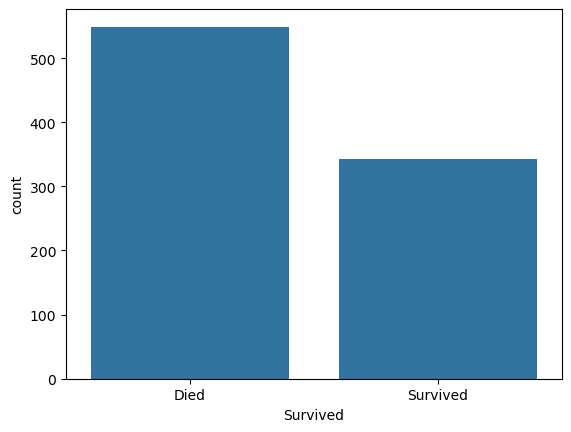

In [48]:
#who survived
b = sns.countplot(x='Survived', data=df)
b.set_xticklabels(['Died', 'Survived'])

C:\Users\adity\AppData\Local\Temp\ipykernel_4188\2663097890.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(['Died', 'Survived'])


[Text(0, 0, 'Died'), Text(1, 0, 'Survived')]

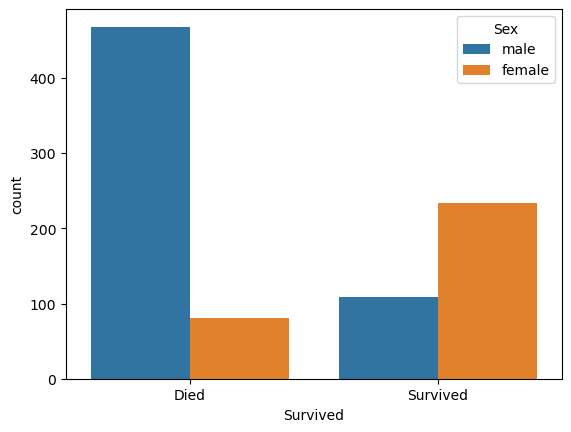

In [49]:
#survival by gender
a = sns.countplot(x='Survived',hue='Sex',data=df)
a.set_xticklabels(['Died', 'Survived'])

C:\Users\adity\AppData\Local\Temp\ipykernel_4188\4235352191.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  c.set_xticklabels(['Died','Survived'])


[Text(0, 0, 'Died'), Text(1, 0, 'Survived')]

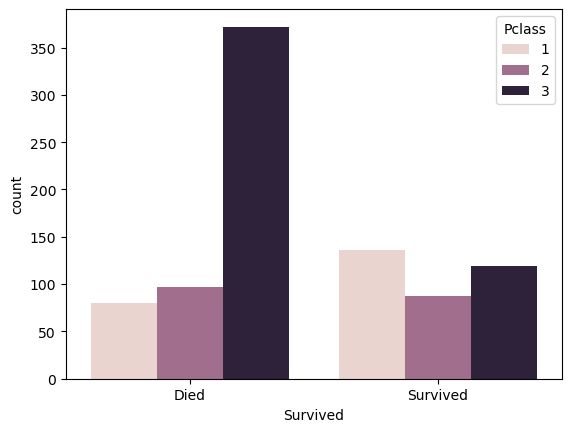

In [50]:
#survival by passenger class
c = sns.countplot(x='Survived',hue='Pclass',data=df)
c.set_xticklabels(['Died','Survived'])

<Axes: xlabel='Age', ylabel='Count'>

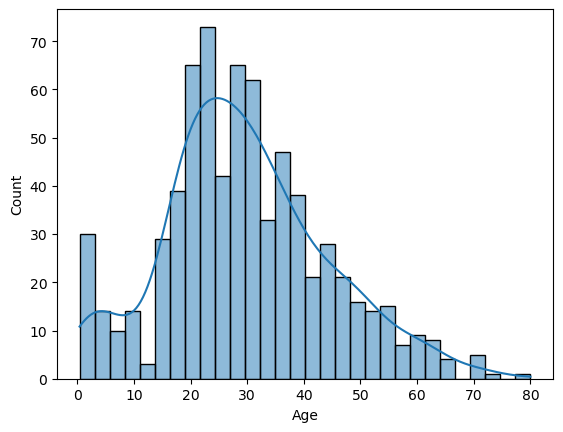

In [51]:
#age distribution
sns.histplot(df['Age'].dropna(),kde=True,bins=30)

 Data Cleaning and Preprocessing

In [54]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [56]:
df['Embarked']= df['Embarked'].fillna(df['Embarked'].mode()[0])

In [57]:
df['Embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [71]:
df.drop('Cabin', axis=1, inplace=True)

In [73]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark= pd.get_dummies(df['Embarked'],drop_first=True)
df= pd.concat([df,sex,embark],axis=1)
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [75]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


Build and Train Models

In [78]:
X = df.drop(['Survived','PassengerId'],axis=1)
y =df['Survived']

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [83]:
X_train.select_dtypes(include=['object']).head()

""
331
733
382
704
813


In [85]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [87]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [89]:
from sklearn.metrics import accuracy_score, classification_report
log_preds = log_model.predict(X_test)
tree_preds = tree_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_preds))
print("\nLogistic Regression Classification Report:\n",classification_report(y_test, log_preds))
print("\nDecision Tree Accuracy:",accuracy_score(y_test, tree_preds))
print("\nDecision Tree Classification Report:\n",classification_report(y_test, tree_preds))

Logistic Regression Accuracy: 0.8100558659217877

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Decision Tree Accuracy: 0.776536312849162

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       105
           1       0.73      0.73      0.73        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

